In [2]:
import pandas as pd

from bam_core.lib.airtable import Airtable
airtable = Airtable()



In [87]:
raw_records = airtable.assistance_requests.all(view='Analysis: Open Grocery Requests by Household', fields=['Building Identification Number', 'Cleaned Address', 'Grocery Factor', 'Case #'])
df = pd.DataFrame([r.get("fields") for r in raw_records])
num_requests = df.shape[0]
total_sets = df['Grocery Factor'].sum()

In [88]:
# identify duplicate BINs
df_bin_count = df.groupby('Building Identification Number')['Case #'].count().reset_index(name="count")
df_dupe_bins = df_bin_count[df_bin_count["count"] > 1]
df["Duplicated Building"] = df["Building Identification Number"].isin(df_dupe_bins["Building Identification Number"].tolist())


In [89]:
# identify duplicate addresses
df_add_count = df.groupby('Cleaned Address')['Case #'].count().reset_index(name="count")
df_dupe_adds = df_add_count[df_add_count["count"] > 1]
df["Duplicated Address"] = df["Cleaned Address"].isin(df_dupe_adds["Cleaned Address"].tolist())


In [91]:
# percentage of requests by dupe BINs
df.groupby("Duplicated Building")['Grocery Factor'].count() / num_requests

Duplicated Building
False    0.488412
True     0.511588
Name: Grocery Factor, dtype: float64

In [92]:
# percentage of sets by dupe BINs
df.groupby("Duplicated Building")['Grocery Factor'].sum() / total_sets

Duplicated Building
False    0.472884
True     0.527116
Name: Grocery Factor, dtype: float64

In [93]:
# mean of grocery factor by dupe BINs
df.groupby("Duplicated Building")['Grocery Factor'].mean()

Duplicated Building
False    1.639719
True     1.744966
Name: Grocery Factor, dtype: float64

In [94]:
# estimated decrease in sets if we deduped by BIN
1 - (df.groupby('Building Identification Number').first()['Grocery Factor'].sum() / total_sets)

0.3375570197668525

In [95]:
# estimated decrease in requests if we deduped by BIN
1 - (df.groupby('Building Identification Number').first()['Grocery Factor'].count() / num_requests)

0.32789699570815456

<Axes: title={'center': 'Open Requests by Duplicated Building and Grocery Factor'}, xlabel='Grocery Factor'>

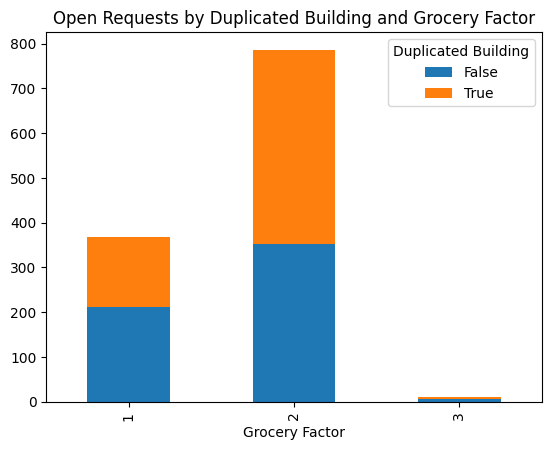

In [97]:
df.groupby(['Grocery Factor', "Duplicated Building"]).size().unstack().plot(kind='bar', stacked=True, title="Open Requests by Duplicated Building and Grocery Factor")

In [98]:
# percentage of requests by dupe ADDs
df.groupby("Duplicated Address")['Grocery Factor'].count() / num_requests

Duplicated Address
False    0.791416
True     0.208584
Name: Grocery Factor, dtype: float64

In [99]:
# percentage of sets by dupe ADDs
df.groupby("Duplicated Address")['Grocery Factor'].sum() / total_sets

Duplicated Address
False    0.787633
True     0.212367
Name: Grocery Factor, dtype: float64

In [100]:
# mean of grocery factor by dupe ADDs
df.groupby("Duplicated Address")['Grocery Factor'].mean()

Duplicated Address
False    1.685466
True     1.724280
Name: Grocery Factor, dtype: float64

In [101]:
# estimated decrease in sets if we deduped by address
1 - (df.groupby('Cleaned Address').first()['Grocery Factor'].sum() / total_sets)

0.12569690826153068

In [102]:
# estimated decrease in requests if we deduped by address
1 - (df.groupby('Cleaned Address').first()['Grocery Factor'].count() / num_requests)

0.1278969957081545

<Axes: title={'center': 'Open Requests by Duplicated Address and Grocery Factor'}, xlabel='Grocery Factor'>

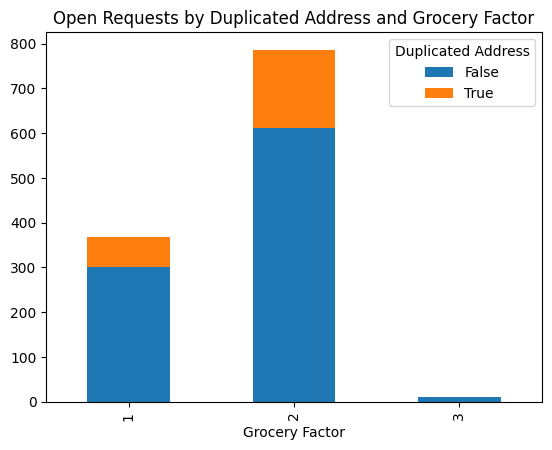

In [103]:
df.groupby(['Grocery Factor', "Duplicated Address"]).size().unstack().plot(kind='bar', stacked=True, title="Open Requests by Duplicated Address and Grocery Factor")
